# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("data/lfw/*/*"))
dog_files = np.array(glob("data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


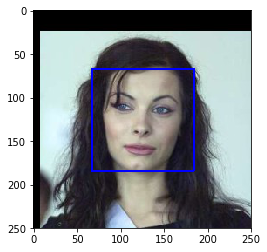

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__

95.00% human faces in human_files_short array

12.00% human faces in dog_files_short array

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_incorrect_prediction = []

human_correct_count = 0
for img_path in human_files_short:
    if face_detector(img_path) == True:
        human_correct_count += 1
    else:
        human_incorrect_prediction.append(img_path)
        
dog_incorrect_prediction = []
dog_correct_count = 0
for img_path in dog_files_short:
    if face_detector(img_path) == True:
        dog_correct_count += 1
    else:
        dog_incorrect_prediction.append(img_path)

human_correct_pct = (float(human_correct_count / len(human_files_short)) * 100)
dog_correct_pct = (float(dog_correct_count / len(dog_files_short)) * 100)
        
print('face_detector has detected {} out of {} ({:.2f}%) human faces in human_files_short array'.format(human_correct_count, len(human_files_short), human_correct_pct))
print('face_detector has detected {} out of {} ({:.2f}%) human faces in dog_files_short array'.format(dog_correct_count, len(dog_files_short), dog_correct_pct))
    
# for img_path in human_incorrect_prediction:
#     show_image(img_path)
    
# for img_path in dog_incorrect_prediction:
#     show_image(img_path)

face_detector has detected 95 out of 100 (95.00%) human faces in human_files_short array
face_detector has detected 12 out of 100 (12.00%) human faces in dog_files_short array


In [5]:
import matplotlib.image as mpimg

def show_image(img_path):
    '''
    Helper function to show an image

    Args:
        img_path: path to an image
    '''
    
    plt.imshow(mpimg.imread(img_path))
    plt.show()

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Get the image
    image = Image.open(img_path).convert('RGB') # use to convert to RGB to support PNG
    
    # Compose the data transform
    data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224), # VGG16 default size is 224 x 224,
        transforms.CenterCrop(224),
        transforms.RandomRotation(5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Apply data transform to the image, the dims is be depth, height and weight
    image_tensor = data_transform(image)
    if use_cuda:
        image_tensor = image_tensor.cuda()
    
    # Pytorch pretrained model expects number of input images, depth, height and weight.
    # Hence we need to add a dimension at the first index
    image_tensor = image_tensor.unsqueeze(0)
    
    predicted_class_indexes = VGG16(image_tensor)
    
    # Need to change it to CPU before we can use numpy
    if use_cuda:    
        predicted_class_indexes = predicted_class_indexes.cpu()
    
    return predicted_class_indexes.data.numpy().argmax() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predicted_class_index = VGG16_predict(img_path)
    
    return predicted_class_index >= 151 and predicted_class_index <= 268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

0.00% dog faces in human_files_short array

99.00% dog faces in dog_files_short array

In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_correct_count = 0
for img_path in human_files_short:
    if dog_detector(img_path) == True:
        human_correct_count += 1
        
dog_correct_count = 0
for img_path in dog_files_short:
    if dog_detector(img_path) == True:
        dog_correct_count += 1

human_correct_pct = (float(human_correct_count / len(human_files_short)) * 100)
dog_correct_pct = (float(dog_correct_count / len(dog_files_short)) * 100)
        
print('dog_detector has detected {} out of {} ({:.2f}%) dog faces in human_files_short array'.format(human_correct_count, len(human_files_short), human_correct_pct))
print('dog_detector has detected {} out of {} ({:.2f}%) dog faces in dog_files_short array'.format(dog_correct_count, len(dog_files_short), dog_correct_pct))

dog_detector has detected 0 out of 100 (0.00%) dog faces in human_files_short array
dog_detector has detected 99 out of 100 (99.00%) dog faces in dog_files_short array


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_path = os.path.relpath('data/dog_images/train')
valid_path = os.path.relpath('data/dog_images/valid')
test_path = os.path.relpath('data/dog_images/test')

data_transform_dict = dict({
    'train' : transforms.Compose([transforms.Resize(size=(224,224)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(15),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    
    'valid' : transforms.Compose([transforms.Resize(size=(224,224)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    
    'test' : transforms.Compose([transforms.Resize(size=(224,224)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])
})

train_image_set = datasets.ImageFolder(train_path, data_transform_dict['train'])
valid_image_set = datasets.ImageFolder(valid_path, data_transform_dict['valid'])
test_image_set = datasets.ImageFolder(test_path, data_transform_dict['test'])

batch_size = 20
num_workers = 16
train_data_loader = torch.utils.data.DataLoader(train_image_set, shuffle=True, num_workers=num_workers, batch_size=batch_size)
valid_data_loader = torch.utils.data.DataLoader(valid_image_set, shuffle=True, num_workers=num_workers, batch_size=batch_size)
test_data_loader = torch.utils.data.DataLoader(test_image_set, shuffle=False, num_workers=num_workers, batch_size=batch_size)

loaders_scratch = dict({
    'train': train_data_loader,
    'valid': valid_data_loader,
    'test': test_data_loader
})

num_classes = len(train_image_set.classes)

print('Images in train_image_set: {}'.format(len(train_image_set)))
print('Images in valid_image_set: {}'.format(len(valid_image_set)))
print('Images in test_image_set: {}'.format(len(test_image_set)))
print('Number of classes: {}'.format(num_classes))

Images in train_image_set: 6680
Images in valid_image_set: 835
Images in test_image_set: 836
Number of classes: 133


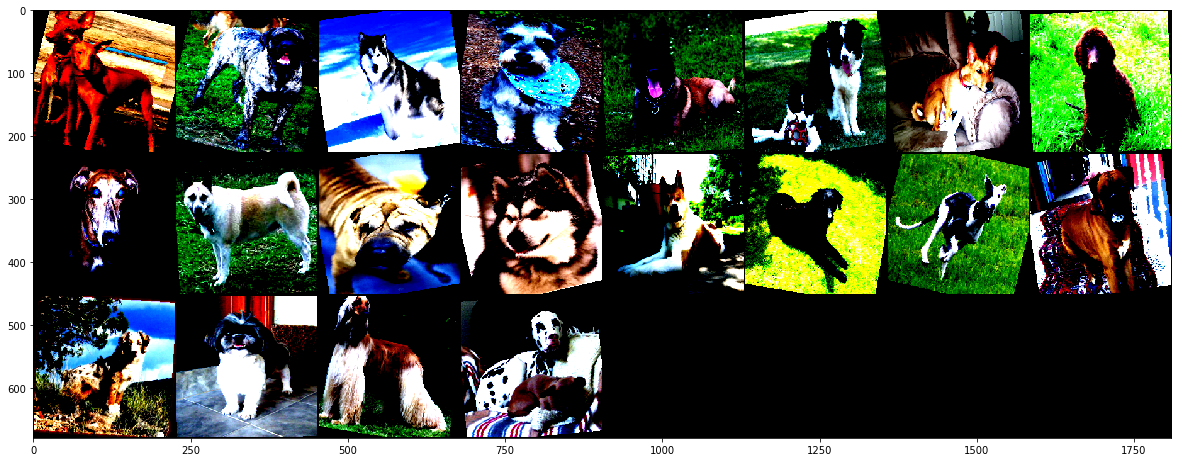

In [13]:
from torchvision import utils

def show_sample_images(input_tensors):
    '''
    Helper function to show sample images in grid

    Args:
        input_tensors: Images in Tensor
    '''
    
    input_tensors = input_tensors.numpy().transpose((1, 2, 0))
    input_tensors = np.clip(input_tensors, 0, 1)
    
    fig = plt.figure(figsize=(20.4, 18.8))
    plt.imshow(input_tensors)
    
# get a batch of training data.    
inputs, classes = next(iter(train_data_loader))

# convert the batch to a grid.
input_tensors_grid = utils.make_grid(inputs)

show_sample_images(input_tensors_grid)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- It resizes the images to 224. I chose 224 x 224 because VGG16 default size is 224 x 224
- I augment the train data by horizontal flip and rotation because that's when the network train. As for valid and test I only resize them to 224

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
# def conv2d_output(w_in, kernel_size=1, stride=1, padding=0):
#     return ((w_in - kernel_size + 2 * padding) / stride) + 1

# output = conv2d_output(224, kernel_size=3, padding=1)

# print(output)

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # convolutional layers
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # 224
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # 112
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) # 56
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1) # 28   
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1) # 14
        self.conv6 = nn.Conv2d(256, 512, 3, padding=1) # 7
        
        # batch normalisation to make to accelerate training
        self.batch_n16 = nn.BatchNorm2d(16)
        self.batch_n32 = nn.BatchNorm2d(32)
        self.batch_n64 = nn.BatchNorm2d(64)
        self.batch_n128 = nn.BatchNorm2d(128)
        self.batch_n256 = nn.BatchNorm2d(256)
        self.batch_n512 = nn.BatchNorm2d(512)
        
        # fully connected layers
        self.fc1 = nn.Linear(512 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, num_classes)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # dropout layer to prevent overfitting
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.batch_n16(self.pool(F.relu(self.conv1(x))))
        x = self.batch_n32(self.pool(F.relu(self.conv2(x))))
        x = self.batch_n64(self.pool(F.relu(self.conv3(x))))
        x = self.batch_n128(self.pool(F.relu(self.conv4(x))))
        x = self.batch_n256(self.pool(F.relu(self.conv5(x))))
        x = self.batch_n512(F.relu(self.conv6(x)))

        # flatten the input image
        x = x.view(-1, 512 * 7 * 7)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer
        x = self.fc2(x)
        
        return x

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I referenced CIFAR10 exercise and added a few more CNN layers.

I initialise 6 conv layers and double the size of the feature maps in each layer where the final layer has 512 feature maps.

I create batch normalisation for each of the feature maps to speed up the training performance. I read some articles about using it. For example, [deep-learning-batch-normalisation](https://medium.com/deeper-learning/glossary-of-deep-learning-batch-normalisation-8266dcd2fa82)

I set max pooling size to 2, I decided to go with this number because I used it in the previous chapter exercises and it gave me pretty good results

I set the dropout to .3 to prevent overfitting and finally have 2 fully connected layers, the output of the first one is 500 and second one is 133 (number of classes in the image sets)

For the forward pass, for each conv layer, I apply relu activation function, downsample it using max pooling (except the last conv layer) and then apply batch normalisation.

I then flatten the input image based on the output image size and number of feature maps, apply dropout, apply relu activation function to the first fully connected layer, apply the dropout again and finally return the second fully connected layer (I don't need to apply relu because the CrossEntropyLoss applies relu).

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        epoch_time = time.time()
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        batch_time = time.time()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                # measure elapsed time
                batch_elapsed = time.time() - batch_time
                batch_time = time.time()
                print('Epoch %d, Batch %d loss: %.6f - Time %.3f' %
                  (epoch, batch_idx + 1, train_loss, batch_elapsed))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        # print training/validation statistics
        epoch_elapsed = time.time() - epoch_time
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tTime: {:.3f}'.format(
            epoch, 
            train_loss,
            valid_loss,
            epoch_elapsed
            ))
        
        ## save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [18]:
# train the model
# Uncoment below if you want to retrain
# model_scratch = train(15, loaders_scratch, model_scratch, optimizer_scratch, 
#                       criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch 1, Batch 1 loss: 4.944187 - Time 1.980
Epoch 1, Batch 101 loss: 4.898880 - Time 13.175
Epoch 1, Batch 201 loss: 4.890092 - Time 9.908
Epoch 1, Batch 301 loss: 4.878178 - Time 10.498
Epoch: 1 	Training Loss: 4.876223 	Validation Loss: 4.831593 	Time: 42.863
Validation loss decreased (inf --> 4.831593). Saving model ...
Epoch 2, Batch 1 loss: 4.765910 - Time 1.756
Epoch 2, Batch 101 loss: 4.807402 - Time 11.799
Epoch 2, Batch 201 loss: 4.791878 - Time 10.241
Epoch 2, Batch 301 loss: 4.778721 - Time 10.836
Epoch: 2 	Training Loss: 4.773890 	Validation Loss: 4.738714 	Time: 42.365
Validation loss decreased (4.831593 --> 4.738714). Saving model ...
Epoch 3, Batch 1 loss: 4.734538 - Time 1.309
Epoch 3, Batch 101 loss: 4.679456 - Time 11.367
Epoch 3, Batch 201 loss: 4.668251 - Time 12.064
Epoch 3, Batch 301 loss: 4.650198 - Time 10.800
Epoch: 3 	Training Loss: 4.648323 	Validation Loss: 4.627907 	Time: 42.830
Validation loss decreased (4.738714 --> 4.627907). Saving model ...
Epoch 4, B

In [19]:
# load the model that got the best validation accuracy
# model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# I couldn't load the state dict directly, I'll get state_dic keys error so found this solution to remove keys that are
# not in the .pt - https://discuss.pytorch.org/t/how-to-load-part-of-pre-trained-model/1113/2
pretrained_dict = torch.load('model_scratch.pt')
# pretrained_dict = ...
model_dict = model_scratch.state_dict()

# 1. filter out unnecessary keys
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
# 2. overwrite entries in the existing state dict
model_dict.update(pretrained_dict) 
# 3. load the new state dict
model_scratch.load_state_dict(pretrained_dict)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [21]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.771282


Test Accuracy: 13% (113/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [22]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)
# print(model_transfer)
# set the requires gradient to each parameter to false because we don't need to do backpropagation 
for param in model_transfer.features.parameters():
    param.requires_grad = False
# replace the last fully connected layer with a new one that has the number of classifications
model_transfer.classifier[6] = nn.Linear(model_transfer.classifier[6].in_features, num_classes)

# print(model_transfer)
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I reused the loaders scratch because it's suitable for the CNN architecture.

VGG architecture is known as a good CNN architecture for image classifying and we used it at the beginning of this project so I thought I'd give it a go. I tried vgg11 which gave me 63% test accuracy and vgg19 gave me 79% test accuracy, with vgg16 I could get a better accuracy, hence I decided to use it.

I set the model_transfer to vgg16 and set the pretrained to True because I wanted to utilise the pretrained model. I set the requires_grad variable for each parameter to be False because I didn't want it to backpropagate.

As suggested in one of the tutorials, I looked at the model_transfer architecture and replaced the last fully connected layer with a new one.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [24]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [25]:
# train the model
n_epochs = 15
# Uncomment below if you want to retrain
# model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch 1, Batch 1 loss: 5.121800 - Time 1.646
Epoch 1, Batch 101 loss: 4.740026 - Time 43.374
Epoch 1, Batch 201 loss: 4.419849 - Time 42.608
Epoch 1, Batch 301 loss: 4.088382 - Time 42.659
Epoch: 1 	Training Loss: 3.968834 	Validation Loss: 2.502557 	Time: 162.934
Validation loss decreased (inf --> 2.502557). Saving model ...
Epoch 2, Batch 1 loss: 3.293962 - Time 1.272
Epoch 2, Batch 101 loss: 2.505579 - Time 42.590
Epoch 2, Batch 201 loss: 2.227593 - Time 42.455
Epoch 2, Batch 301 loss: 2.040584 - Time 42.540
Epoch: 2 	Training Loss: 1.989428 	Validation Loss: 1.120803 	Time: 160.734
Validation loss decreased (2.502557 --> 1.120803). Saving model ...
Epoch 3, Batch 1 loss: 1.223859 - Time 1.631
Epoch 3, Batch 101 loss: 1.350460 - Time 42.456
Epoch 3, Batch 201 loss: 1.312109 - Time 42.490
Epoch 3, Batch 301 loss: 1.260635 - Time 42.520
Epoch: 3 	Training Loss: 1.251125 	Validation Loss: 0.791615 	Time: 161.354
Validation loss decreased (1.120803 --> 0.791615). Saving model ...
Epoch 

In [26]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [27]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.506305


Test Accuracy: 85% (713/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [28]:
def image_to_tensor(img_path):
    # Get the image - if we don't use RGB it cannot convert PNG
    image = Image.open(img_path).convert('RGB')
    
    # Compose the data transform
    data_transform = transforms.Compose([
        transforms.Resize(size=(224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Apply data transform to the image, the dims is be depth, height and weight
    image_tensor = data_transform(image)
    
    # Pytorch pretrained model expects number of input images, depth, height and weight.
    # Hence we need to add a dimension at the first index
    image_tensor = image_tensor.unsqueeze(0)
    
    return image_tensor

In [29]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_image_set.classes]

def predict_breed_transfer(img_path):
    image_tensor = image_to_tensor(img_path)
    if use_cuda:
        image_tensor = image_tensor.cuda()
        
    output = model_transfer(image_tensor)
    _, prediction_idx = torch.max(output.data, 1)
    
    # return the predicted breed
    return class_names[prediction_idx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [30]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path):
        dog_breed = predict_breed_transfer(img_path)
        print('Hello, human! You look like %s' % (dog_breed))
    elif dog_detector(img_path):
        dog_breed = predict_breed_transfer(img_path)
        print('It\'s %s ' % dog_breed)
    else:
        print('Umm, it\'s not human nor dog')
    show_image(img_path)
    print()

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output was better than I expected and that's a great thing!

Possible improvements

1. Train with bigger data set.
2. Double the epoch and see if it can be further improved or stuck after n-th epoch.
3. Replace the classifier with a new Sequential, different dropout probability and different out_features in the first 2 fully connected layer

Hello, human! You look like Chinese crested


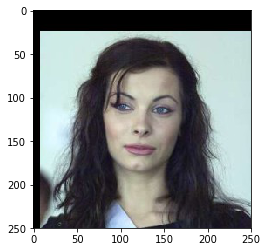


Hello, human! You look like Pointer


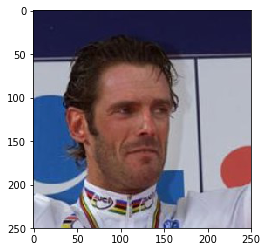


Hello, human! You look like Pharaoh hound


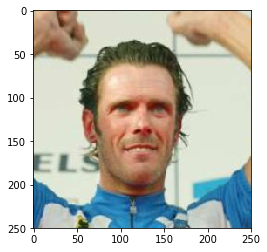


It's Dachshund 


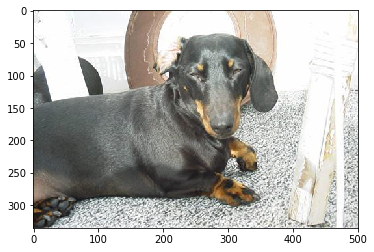


It's Dachshund 


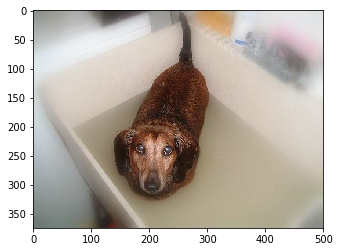


It's Dachshund 


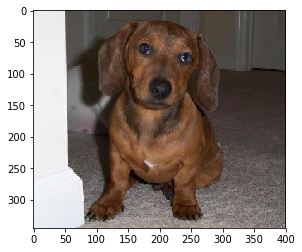

In [31]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

Hello, human! You look like Chihuahua


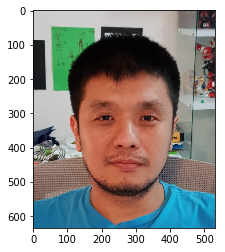

In [33]:
run_app('images/makoto.png')

Hello, human! You look like Dogue de bordeaux


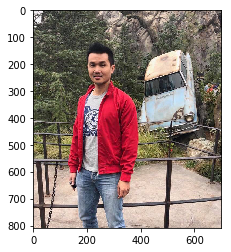

In [34]:
run_app('images/stanley.jpg')

It's Dachshund 


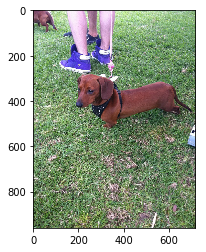

In [35]:
run_app('images/dog1.jpg')

It's Bullmastiff 


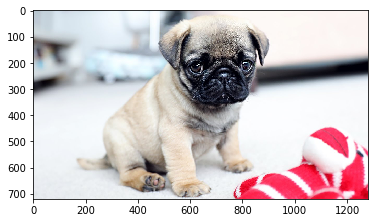

In [36]:
run_app('images/dog2.jpg')

It's Pomeranian 


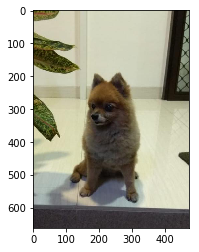

In [37]:
run_app('images/dog3.jpeg')

Umm, it's not human nor dog


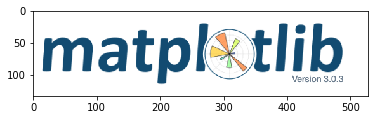

In [38]:
run_app('images/matplotlib.png')